In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy import fft

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [16]:
mu = 6.3
Z = 3.
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print('max significant probability: ', pvalue)
#first we will obtain the deviation for a poisson distribution with mean=6.3
mean, var = stats.poisson.stats(mu,loc=0, moments='mv')
Z=(15-mu)/var
print('Z-value: ',Z)
pvalue2 = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print('probability of 15 hurricanes on a year: ', pvalue2)

print('since the probability is larger than the maximun to consider it significant, it is not significally different to have 15 hurricanes on one year')

max significant probability:  0.0026997960632601965
Z-value:  1.380952380952381
probability of 15 hurricanes on a year:  0.1672936026551683
since the probability is larger than the maximun to consider it significant, it is not significally different to have 15 hurricanes on one year


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [19]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#we calculate the variations
sigpre = np.var(pre)
sigpost = np.var(post)
sig=np.sqrt((sigpre**2+sigpost**2)/2)
#we calculate the means
premean = np.mean(pre)
postmean = np.mean(post)
#T-VALUE
T=(premean-postmean)/(sig*np.sqrt(2/len(pre)))

pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))
print(pvalue)

print('pvalue is not less than 0.025, then the change of blood preasure is not significant')


0.7222414397901233
pvalue is not less than 0.025, then the change of blood preasure is not significant


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

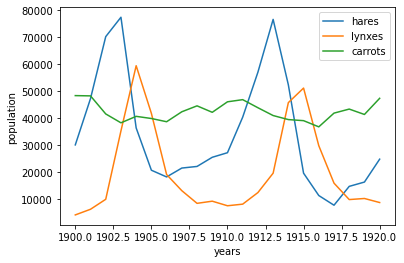

C:\Users\germa\AppData\Local\Temp/ipykernel_3576/1469754396.py:18: RuntimeWarning: divide by zero encountered in true_divide
  T_ha=1/hafr
C:\Users\germa\AppData\Local\Temp/ipykernel_3576/1469754396.py:22: RuntimeWarning: divide by zero encountered in true_divide
  T_ly=1/lyfr


Text(0, 0.5, 'Power')

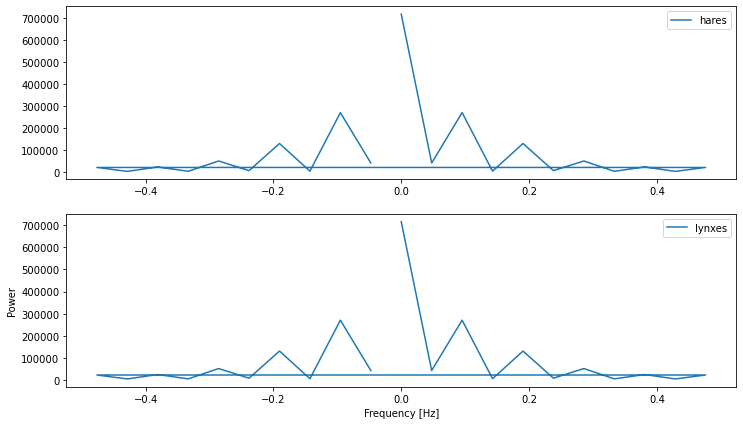

In [16]:
popu=np.loadtxt('populations.txt')
year=popu[:,0]
hares=popu[:,1]
lynxes=popu[:,2]
carrots=popu[:,3]

plt.plot(year,hares)
plt.plot(year,lynxes)
plt.plot(year,carrots)
plt.xlabel('years')
plt.ylabel('population')
plt.legend(['hares','lynxes','carrots'])
plt.show()

#for the hares
HA = fft.fft(hares)
hafr = fft.fftfreq(hares.size, d= year[1]-year[0])
T_ha=1/hafr
#for the lynxes
LY = fft.fft(lynxes)
lyfr = fft.fftfreq(lynxes.size, d= year[1]-year[0])
T_ly=1/lyfr

fig, (g1,g2)=plt.subplots(2,1, figsize=(12,7))
g1.plot(hafr, abs(HA), label='hares')
g2.plot(lyfr, abs(HA), label='lynxes')
g1.legend()
g2.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

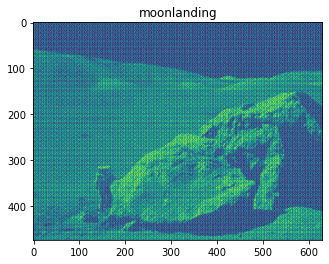

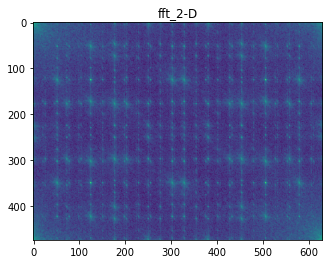

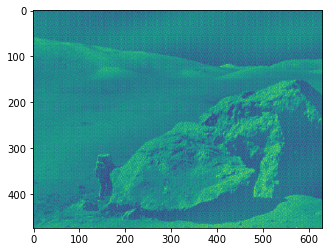

In [43]:
from matplotlib.colors import LogNorm
img=plt.imread('moonlanding.png').astype('float')
plt.imshow(img)
plt.title('moonlanding')
plt.show()

#2-D fft of the image
imgfft=fft.fft2(img)
power=np.abs(imgfft)
plt.imshow(power , norm = LogNorm(vmin=5))
plt.title('fft_2-D')
plt.show()
#remove the higher values that are equivalent to the noise
imgfft[power > 3000]=0

#execute the inverse fft removing the filtered data of the original set

filtered_image = fft.ifft2(imgfft).real
plt.imshow(filtered_image)